## Representing Qubit States

---

### Classical System:
Car's position when measured along 1 axis can be denoted as x = 4

<img src="./resources/i02_classical_car.png" width="40%"/>

Or, it can be described with the statevector |x> with probability amplitudes as the vector's elements

<img src="./resources/i03_car_statevector.png" width="40%"/>

<br>

### Quantum System:
A qubit can be in superposition (linear combination) of its basis states (using computational basis states |0> and |1>)

<img src="./resources/i04_qubit_statevector.png" width="20%"/>

<br>

In [5]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

print("Process Complete!")

Process Complete!


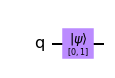

In [6]:
qc = QuantumCircuit(1)

initial_state = [0, 1]  # |1>
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

In [7]:
sim = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(1)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.save_statevector()


qc = transpile(qc, sim)

result = sim.run(qc).result()

out_state = result.get_statevector()
print(out_state)

print("\nProcess Complete!")

[0.+0.j 1.+0.j]

Process Complete!


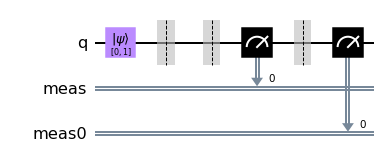

In [9]:
qc.measure_all()
qc.draw(output='mpl')

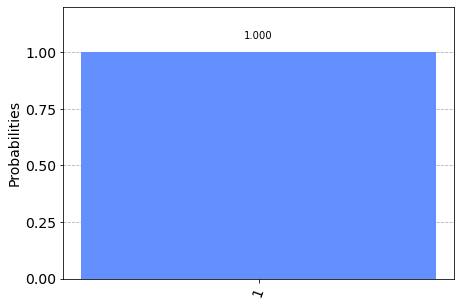

In [10]:
counts = result.get_counts()
plot_histogram(counts)  # Get 100% chance of measuring 1 since the qubit was |1>

In [11]:
# Trying the same for |q0>
initial_state = [1 / sqrt(2), 1j / sqrt(2)]

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.save_statevector()

qc = transpile(qc, sim)
result = sim.run(qc).result()

out_state = result.get_statevector()
print(out_state)

print("\nProcess Complete!")

[0.70710678+0.j         0.        +0.70710678j]

Process Complete!


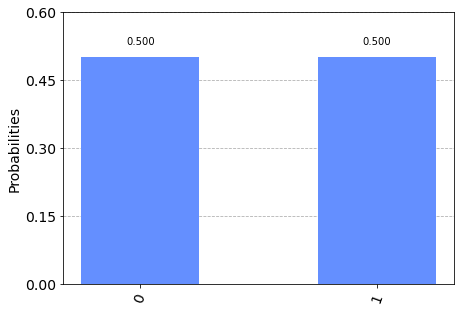

In [12]:
counts = result.get_counts()
plot_histogram(counts)  # 50% chance of getting 0, and 50% chance of getting 1

---
### The Rules of Measurement

By the Born Rule, the probability of getting $x$ after measuring a qubit in state $|\psi>$ is given by,

$$p(x) = |<x|\psi>|^2$$

Here, if $|\psi>$ is represented by a column vector with the basis states $x_i$, then $x$ is one of the basis states to which the qubit will collapse to.

$|x>$ = Ket of x (Column Vector)  
$<x|$ = Bra of x (Row Vector),  
such that $<x| = |x>^\dagger$

For example, the probability of measuring $|0>$ when $|\psi>$ is measured along the computational basis is:  
<img src="./resources/i05_born_rule_example.png" width="30%"/>




In [ ]:
### The Implications of this Rule